In [1]:
import matplotlib.pyplot as plt
import random
import math

# Data generation

The data has been generated with the condition, if(distance of a point from the point (50,50)<=30,1,0)



In [2]:
import pandas as pd

df = pd.read_csv('../resource/data-4-2.csv')
df.head()

,X1,X2,Y
0,98,56,0
1,57,91,0
2,60,7,0
3,7,82,0
4,20,73,0


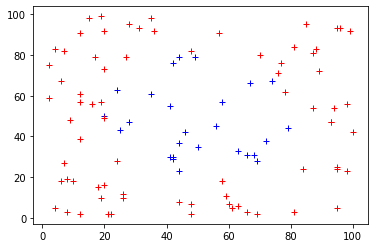

In [3]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "b+")


# Problem with the network

The neural network in this case is not learning. The loss is not decreasing. This could be due to issues in data, like: the data is not sufficient, the condition for the classification is faulty.

In [ ]:
W = [random.random(), random.random()]
b = random.random()

print(W, b)

lr=0.001
activation_condition=0.5

In [ ]:
epoch = 0
count_correct = 0

while count_correct < 60 :
    
    total_error = 0
    print(f"Epoch: {epoch}")
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > activation_condition:
            pred = 1
        
        error =  Y[i] - pred
        if error != 0:
            count_correct = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count_correct += 1

        print(f"[{X1[i]} , {X2[i]}] = {pred}")
    
    print(f"Loss: {total_error}")
    print("===------------------------------===")
    epoch += 1

In [ ]:
plt.figure()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "b+")
    else:
        plt.plot(X1[i], X2[i], "r+")
    
plt.xlim([0, 110])
plt.ylim([0, 110])

xintr=(activation_condition-b)/W[0]
yintr=(activation_condition-b)/W[1]

slope=-yintr/xintr
xx=plt.xlim()
yeq = []

for x in xx:
    yeq.append(slope*x+yintr)

plt.plot(xx,yeq)
plt.show()